#обработка данных

In [1]:
 import pandas as pd

# Укажите путь к вашему файлу в Google Drive
file_path = '/content/Новая форма (Ответы) 1 (1).xlsx'

# Загрузка Excel-файла
df = pd.read_excel(file_path)
# Удаление первых двух столбцов
df.drop(df.columns[:2], axis=1, inplace=True)
df.drop(df.columns[4], axis=1, inplace=True)
df.drop(df.columns[11], axis=1, inplace=True)
# Замена значений в первом столбце
df.iloc[:, 0] = df.iloc[:, 0].apply(lambda x: 0 if x <20 else 1 )
df[df.columns[1]] = df[df.columns[1]].replace({'М': 1, 'Ж': 0})
df[df.columns[2]] = df[df.columns[2]].replace({'1 спец': 0, '2 спец': 1, '3 спец': 2, '4 спец': 3, '5 спец': 4, '6 спец': 5, '1 маг': 6, '2 маг': 7})
df[df.columns[6]] = df[df.columns[6]].replace({'да': 1, 'нет': 0})
df[df.columns[8]] = df[df.columns[8]].replace({'да': 1, 'нет': 0})
df.iloc[:, 10] = df.iloc[:, 10].apply(lambda x: 0 if x == 'Телефон' else 1 if (x=='Компьютер' or x=='ноутбук') else 2)
df[df.columns[20]] = df[df.columns[20]].replace({'Другой ВУЗ': 1, 'МГУ': 0})
# Просмотр первых нескольких строк данных
print(df.head() )
output_path = '/content/dataproject1.xlsx'
df.to_excel(output_path)



FileNotFoundError: [Errno 2] No such file or directory: '/content/Новая форма (Ответы) 1 (1).xlsx'

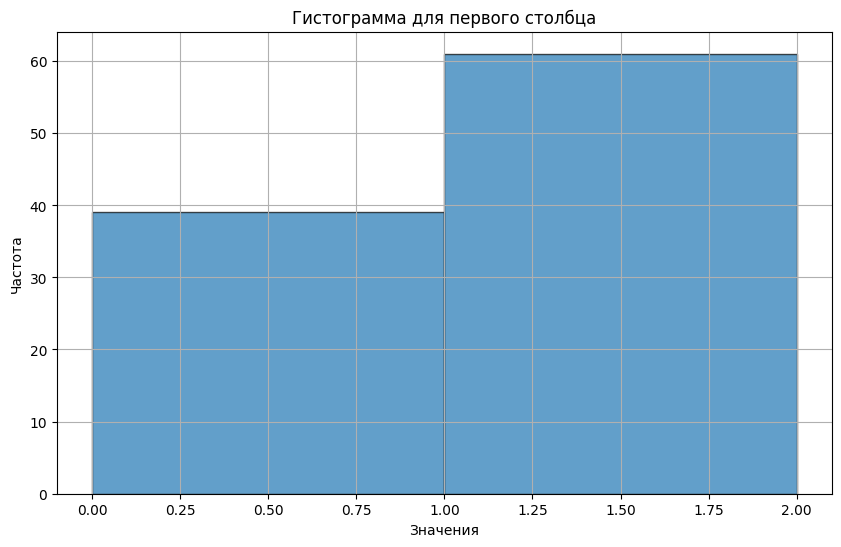

0.61
61


In [2]:
from matplotlib import pyplot as plt
# Построение гистограммы для первого столбца
plt.figure(figsize=(10, 6))
plt.hist(df.iloc[:, 0],  bins=range(int(df.iloc[:, 0].min()), int(df.iloc[:, 0].max()) + 2), edgecolor='k', alpha=0.7)
plt.title('Гистограмма для первого столбца')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.grid(True)
plt.show()
print(df.iloc[:, 0].mean())
print((df.iloc[:, 0] == 1).sum())

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Загрузка данных из файла
file_path = '/content/dataproject.xlsx'
df = pd.read_excel(file_path)

df = df.drop(df.columns[0], axis=1)
# Заполнение пропущенных значений средним по каждому столбцу
df = df.fillna(df.mean())

# Разделение данных на признаки (X) и целевую переменную (y)
X = df.iloc[:, 1:]  # Все столбцы, кроме первого
y = df.iloc[:, 0]   # Первый столбец

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Стандартизация данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Graphs

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.model_selection import learning_curve
import numpy as np
# Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.title('Confusion Matrix')
    plt.show()

# ROC Curve
def plot_roc(y_true, y_prob):
    fpr, tpr, a = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)
    print(roc_auc)
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# Построение Precision-Recall кривой
def plot_precision_recall(y_true, y_prob):
    precision, recall, _ = precision_recall_curve(y_true, y_prob)
    pr_auc = average_precision_score(y_true, y_prob)
    print(pr_auc)
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (area = {pr_auc:.2f})')
    plt.plot([0, 1], [1, 0], color='red', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower left")
    plt.show()

#Logit regression

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.82      0.86        11
           1       0.80      0.89      0.84         9

    accuracy                           0.85        20
   macro avg       0.85      0.85      0.85        20
weighted avg       0.86      0.85      0.85        20

Confusion Matrix:
[[9 2]
 [1 8]]
[0.24258103 0.60612508 0.24794475 0.33227809 0.30318705 0.6470119
 0.1617406  0.41162496 0.99885919 0.95569682 0.26949025 0.99715859
 0.98636561 0.93318821 0.64957684 0.65112136 0.89819412 0.49234718
 0.13246112 0.0999058 ]


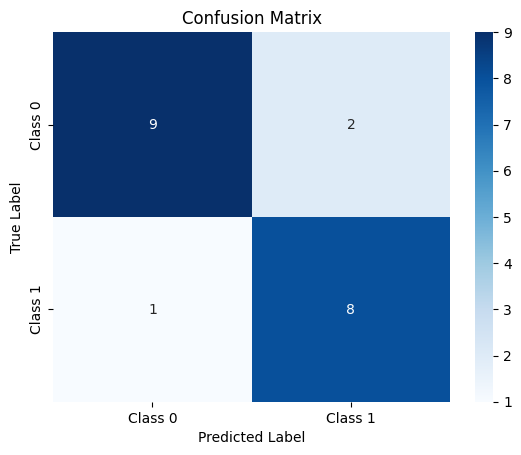

ROC AUC: 0.9393939393939393


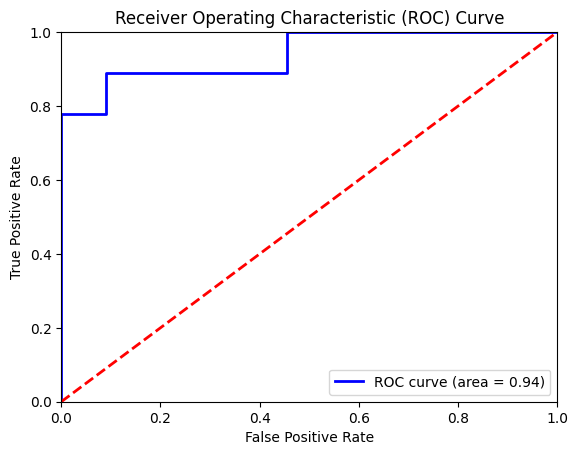

Precision-Recall AUC: 0.9479717813051147


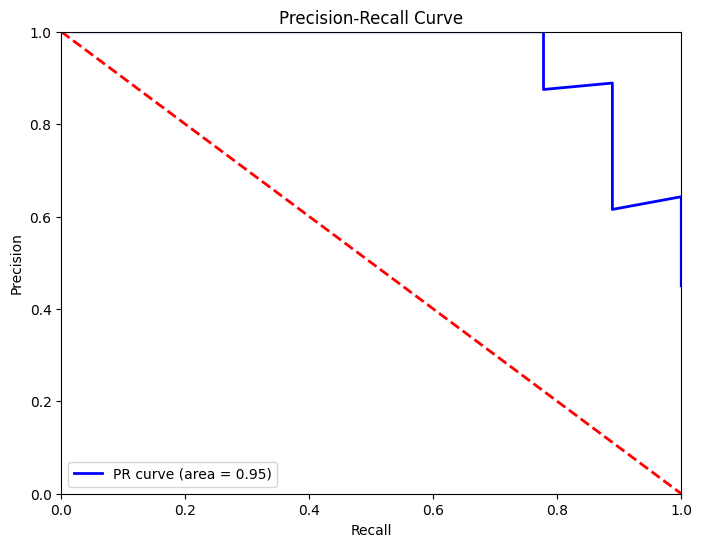

In [85]:
# Создание и обучение модели логистической регрессии
model = LogisticRegression()
model.fit(X_train, y_train)
# Получение параметров по умолчанию
default_params = model.get_params()

print(default_params)
# Прогнозирование на тестовой выборке
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Оценка модели
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)
print('Confusion Matrix:')
print(conf_matrix)
print(y_prob)

# Построение графиков
labels = ['Class 0', 'Class 1']
plot_confusion_matrix(y_test, y_pred, labels)
plot_roc(y_test, y_prob)
plot_precision_recall(y_test, y_prob)


#SVM

Лучшие гиперпараметры: {'C': 1, 'gamma': 1, 'kernel': 'linear'}
Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        11
           1       0.88      0.78      0.82         9

    accuracy                           0.85        20
   macro avg       0.85      0.84      0.85        20
weighted avg       0.85      0.85      0.85        20

Confusion Matrix:
[[10  1]
 [ 2  7]]


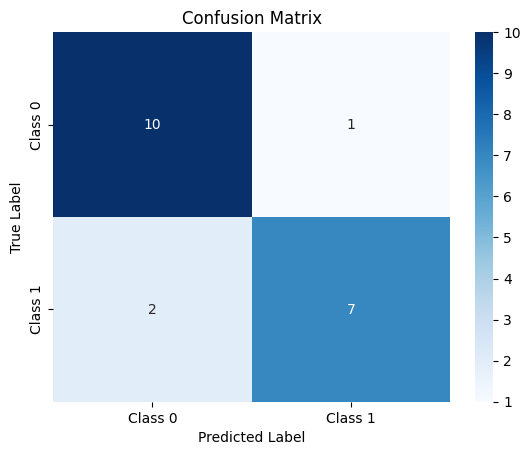

ROC AUC: 0.9292929292929293


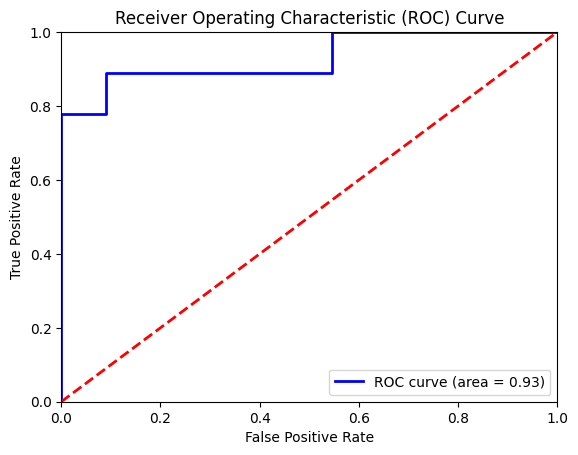

Precision-Recall AUC: 0.94320987654321


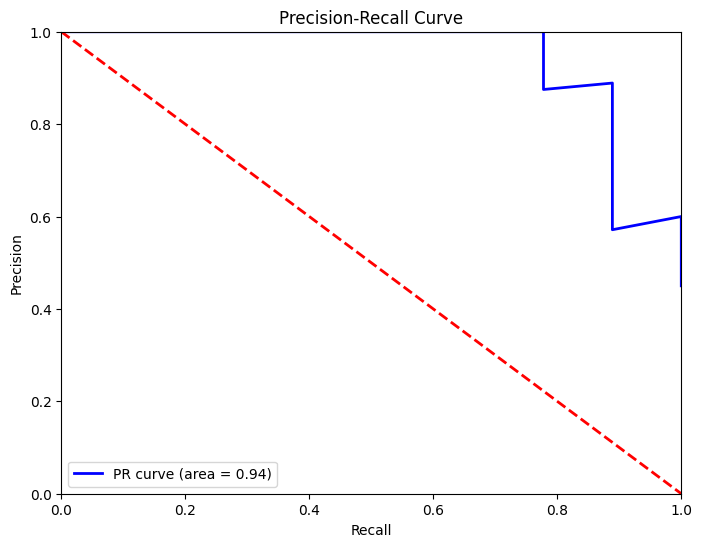

In [83]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Определение гиперпараметров для поиска по сетке
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

# Создание модели SVM
svc = SVC(probability=True)

# Создание объекта GridSearchCV
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Обучение модели с использованием Grid Search
grid_search.fit(X_train, y_train)

# Получение лучших гиперпараметров
best_params = grid_search.best_params_
print("Лучшие гиперпараметры:", best_params)

# Оценка модели с лучшими гиперпараметрами

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

# Вычисление метрик
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Оценка производительности модели
print(f'Accuracy: {accuracy}')
print("Classification Report:")
print(report)
print("Confusion Matrix:")
print(conf_matrix)

# Построение графиков
labels = ['Class 0', 'Class 1']
plot_confusion_matrix(y_test, y_pred, labels)
plot_roc(y_test, y_prob)
plot_precision_recall(y_test, y_prob)


#KNN

Accuracy: 0.65
              precision    recall  f1-score   support

           0       0.75      0.55      0.63        11
           1       0.58      0.78      0.67         9

    accuracy                           0.65        20
   macro avg       0.67      0.66      0.65        20
weighted avg       0.68      0.65      0.65        20

[[6 5]
 [2 7]]


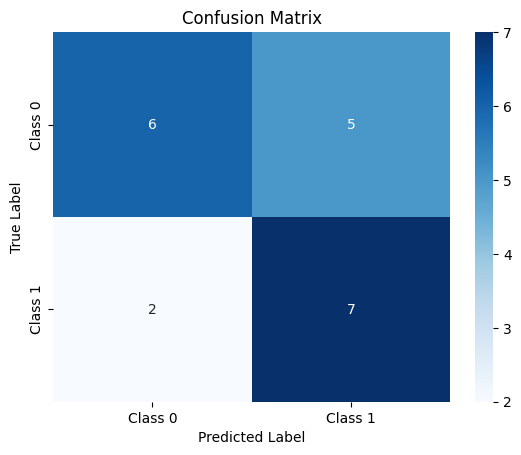

ROC AUC: 0.7323232323232323


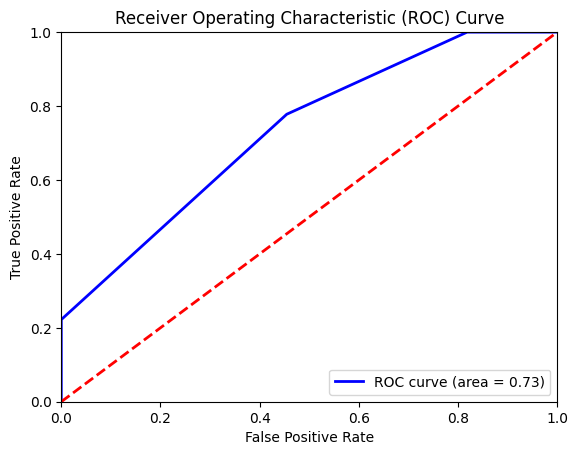

Precision-Recall AUC: 0.6574074074074074


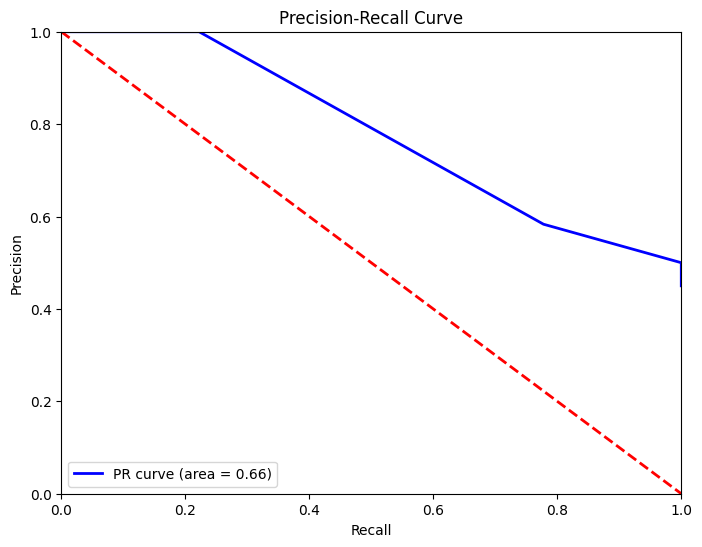

In [84]:
from sklearn.neighbors import KNeighborsClassifier
# Обучение модели k-NN
k = 6  # Можно настроить значение k
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = model.predict(X_test)

# Вычисление метрик
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
y_prob = model.predict_proba(X_test)[:, 1]  # Вероятности для класса 1

# Оценка производительности модели
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Построение графиков
labels = ['Class 0', 'Class 1']
plot_confusion_matrix(y_test, y_pred, labels)
plot_roc(y_test, y_prob)
plot_precision_recall(y_test, y_prob)


#Решающие деревья

Лучшие гиперпараметры: {'class_weight': None, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
Accuracy: 0.9
Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        11
           1       1.00      0.78      0.88         9

    accuracy                           0.90        20
   macro avg       0.92      0.89      0.90        20
weighted avg       0.92      0.90      0.90        20

Confusion Matrix:
[[11  0]
 [ 2  7]]


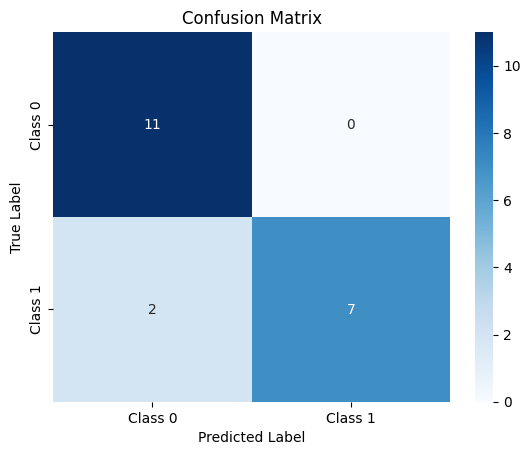

0.8989898989898989


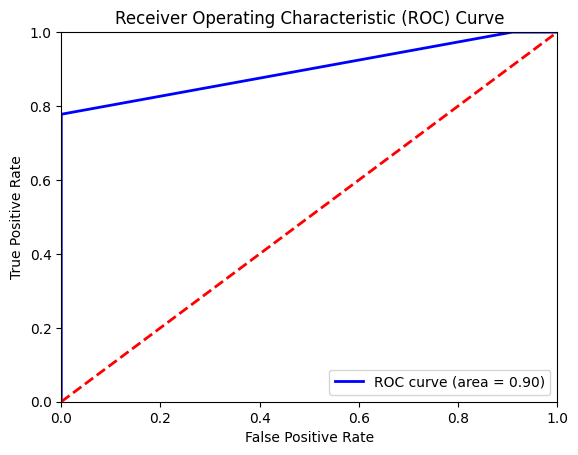

0.8830409356725146


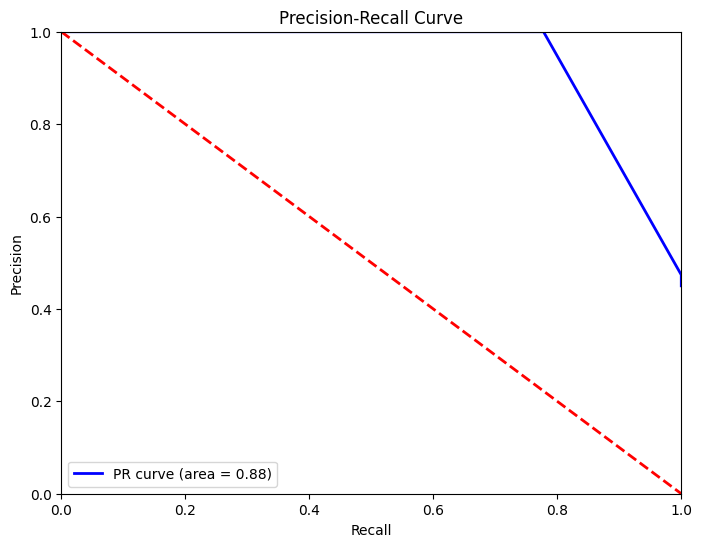

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
# Определение гиперпараметров для поиска по сетке
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'class_weight': [None, 'balanced']
}

# Создание модели решающего дерева
model = DecisionTreeClassifier(random_state=42)

# Поиск по сетке с использованием кросс-валидации
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Лучшие гиперпараметры
best_params = grid_search.best_params_
print("Лучшие гиперпараметры:", best_params)

# Оценка модели с лучшими гиперпараметрами
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]  # Вероятности для класса 1

# Оценка модели
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)
print('Confusion Matrix:')
print(conf_matrix)

# Построение графиков
labels = ['Class 0', 'Class 1']
plot_confusion_matrix(y_test, y_pred, labels)
plot_roc(y_test, y_prob)
plot_precision_recall(y_test, y_prob)


#Случайный лес

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ut

Лучшие гиперпараметры: {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100}
Accuracy: 0.7
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.45      0.62        11
           1       0.60      1.00      0.75         9

    accuracy                           0.70        20
   macro avg       0.80      0.73      0.69        20
weighted avg       0.82      0.70      0.68        20

Confusion Matrix:
[[5 6]
 [0 9]]


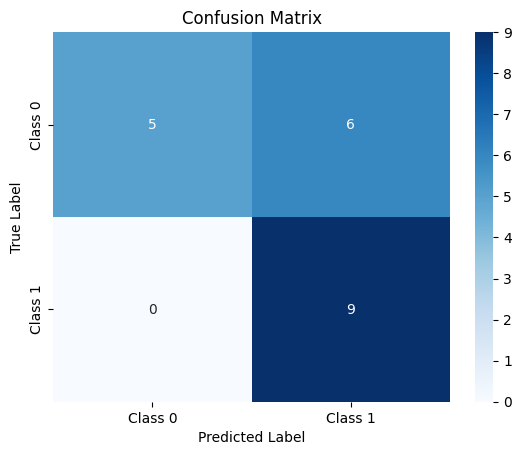

ROC AUC: 0.9393939393939394


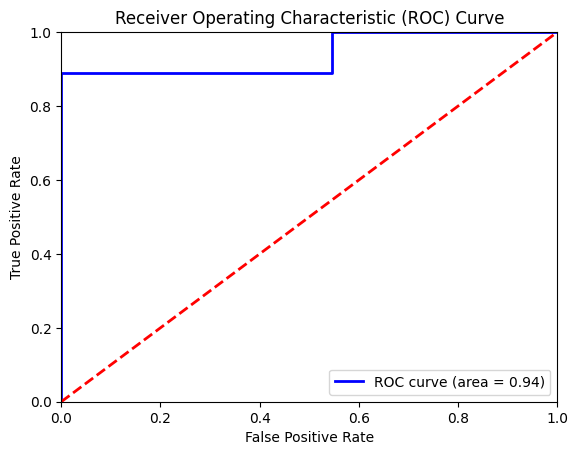

Precision-Recall AUC: 0.9555555555555557


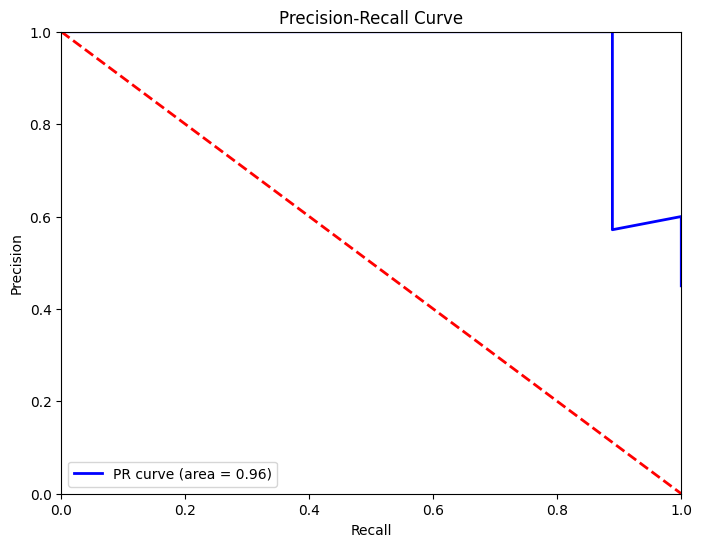

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Определение модели
model = RandomForestClassifier()

# Определение сетки гиперпараметров
param_grid = {
    'n_estimators': [20, 50, 100],  # Количество деревьев в лесу
    'max_depth': [2, 3, 5, 7],    # Максимальная глубина деревьев
    'min_samples_split': [1, 2, 3],   # Минимальное количество образцов для разделения узла
    'min_samples_leaf': [1, 2, 3]      # Минимальное количество образцов в листе
}

# Создание объекта GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Обучение GridSearchCV на обучающих данных
grid_search.fit(X_train, y_train)

# Получение лучших гиперпараметров
best_params = grid_search.best_params_
print("Лучшие гиперпараметры:", best_params)

# Применение лучших гиперпараметров к модели
best_model = grid_search.best_estimator_

# Прогнозирование на тестовых данных с использованием лучшей модели
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

# Оценка производительности модели
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)
print('Confusion Matrix:')
print(conf_matrix)

# Построение графиков (если необходимо)
plot_confusion_matrix(y_test, y_pred, labels)
plot_roc(y_test, y_prob)
plot_precision_recall(y_test, y_prob)




#Градиентный бустинг

Лучшие гиперпараметры: {'learning_rate': 0.7, 'max_depth': 2, 'n_estimators': 300}
Accuracy: 0.8
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.73      0.80        11
           1       0.73      0.89      0.80         9

    accuracy                           0.80        20
   macro avg       0.81      0.81      0.80        20
weighted avg       0.82      0.80      0.80        20

Confusion Matrix:
[[8 3]
 [1 8]]


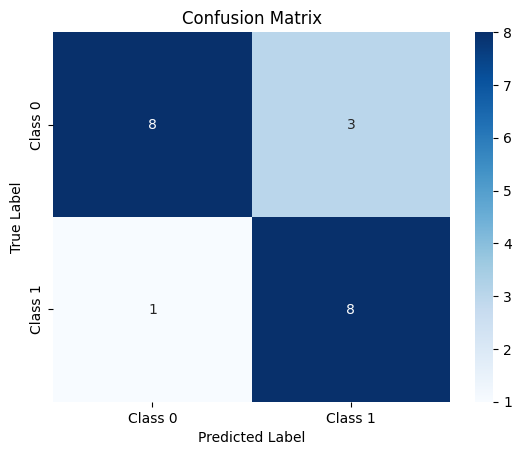

ROC AUC: 0.9191919191919191


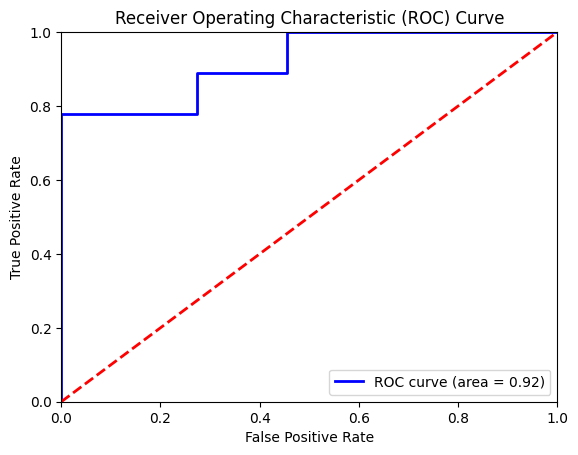

Precision-Recall AUC: 0.9300144300144302


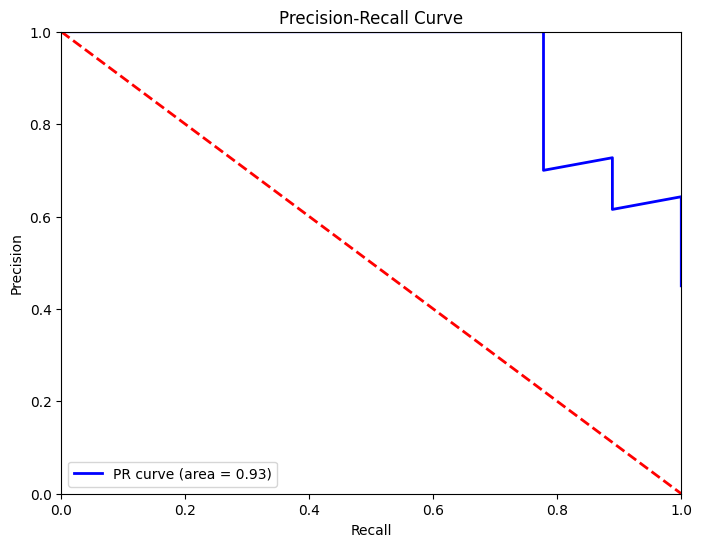

In [80]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Определение модели градиентного бустинга
gb_model = GradientBoostingClassifier()

# Задание сетки гиперпараметров для перебора
param_grid = {
    'n_estimators': [200, 300],
    'learning_rate': [0.7, 1, 1.5],
    'max_depth': [2,3,4, 5,6, 7]
}

# Создание объекта GridSearchCV
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5)

# Обучение модели с использованием GridSearchCV
grid_search.fit(X_train, y_train)

# Вывод лучших гиперпараметров
print("Лучшие гиперпараметры:", grid_search.best_params_)

# Получение предсказаний на тестовом наборе данных
y_pred = grid_search.predict(X_test)
y_prob = grid_search.predict_proba(X_test)[:, 1]

# Оценка производительности модели
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)
print('Confusion Matrix:')
print(conf_matrix)

# Построение графиков
labels = ['Class 0', 'Class 1']
plot_confusion_matrix(y_test, y_pred, labels)
plot_roc(y_test, y_prob)
plot_precision_recall(y_test, y_prob)
